## **POLARS for Python**

###**Installation**
First, install Polars using pip:

In [1]:
pip install polars


Basic Usage

**1. Importing Polars**

In [2]:
import polars as pl


**2. Creating a DataFrame**

   From a dictionary:

In [3]:
data = {
    "name": ["Prajwal", "Sai ", "Chintu"],
    "age": [25, 30, 35],
    "city": ["New York", "Los Angeles", "Chicago"]
}

df = pl.DataFrame(data)
print(df)


shape: (3, 3)
┌─────────┬─────┬─────────────┐
│ name    ┆ age ┆ city        │
│ ---     ┆ --- ┆ ---         │
│ str     ┆ i64 ┆ str         │
╞═════════╪═════╪═════════════╡
│ Prajwal ┆ 25  ┆ New York    │
│ Sai     ┆ 30  ┆ Los Angeles │
│ Chintu  ┆ 35  ┆ Chicago     │
└─────────┴─────┴─────────────┘


**3**. **Accessing and Modifying Data**
   
      Accessing Columns:

In [4]:
print(df["name"])


shape: (3,)
Series: 'name' [str]
[
	"Prajwal"
	"Sai "
	"Chintu"
]


**Filtering Rows:**

In [5]:
filtered_df = df.filter(pl.col("age") > 28)
print(filtered_df)


shape: (2, 3)
┌────────┬─────┬─────────────┐
│ name   ┆ age ┆ city        │
│ ---    ┆ --- ┆ ---         │
│ str    ┆ i64 ┆ str         │
╞════════╪═════╪═════════════╡
│ Sai    ┆ 30  ┆ Los Angeles │
│ Chintu ┆ 35  ┆ Chicago     │
└────────┴─────┴─────────────┘


**Adding a New Column:**

In [7]:
df = df.with_columns((pl.col("age") * 2).alias("age_doubled"))
print(df)

shape: (3, 4)
┌─────────┬─────┬─────────────┬─────────────┐
│ name    ┆ age ┆ city        ┆ age_doubled │
│ ---     ┆ --- ┆ ---         ┆ ---         │
│ str     ┆ i64 ┆ str         ┆ i64         │
╞═════════╪═════╪═════════════╪═════════════╡
│ Prajwal ┆ 25  ┆ New York    ┆ 50          │
│ Sai     ┆ 30  ┆ Los Angeles ┆ 60          │
│ Chintu  ┆ 35  ┆ Chicago     ┆ 70          │
└─────────┴─────┴─────────────┴─────────────┘


**3. Aggregations**

  **Data Used:**

In [10]:
data = {
    "name": ["Prajwal", "Sai ", "Chintu", "Raj"],
    "age": [25, 30, 35, 40],
    "city": ["New York", "Los Angeles", "Chicago", "New York"]
}
df = pl.DataFrame(data)


Lazy Execution Example:
Filter for people older than 28 and select specific columns:

In [12]:
lazy_df = df.lazy()
result = lazy_df.filter(pl.col("age") > 28).select(["name", "age"]).collect()
print(result)

shape: (3, 2)
┌────────┬─────┐
│ name   ┆ age │
│ ---    ┆ --- │
│ str    ┆ i64 │
╞════════╪═════╡
│ Sai    ┆ 30  │
│ Chintu ┆ 35  │
│ Raj    ┆ 40  │
└────────┴─────┘


**5. Joining DataFrames**

Data for Example: Two datasets representing user information and their corresponding scores

In [13]:
data1 = {
    "id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"]
}
data2 = {
    "id": [1, 2, 4],
    "score": [85, 90, 78]
}
df1 = pl.DataFrame(data1)
df2 = pl.DataFrame(data2)


**Joining Example:**
Perform an inner join on id:

In [15]:
joined_df = df1.join(df2, on="id", how="inner")
print(joined_df)


shape: (2, 3)
┌─────┬───────┬───────┐
│ id  ┆ name  ┆ score │
│ --- ┆ ---   ┆ ---   │
│ i64 ┆ str   ┆ i64   │
╞═════╪═══════╪═══════╡
│ 1   ┆ Alice ┆ 85    │
│ 2   ┆ Bob   ┆ 90    │
└─────┴───────┴───────┘


**6. Speed Test**

Data Used: Generate a random dataset with 1,000,000 rows and 3 columns:

In [17]:
import numpy as np
data = np.random.rand(1_000_000, 3)
print(data)


[[0.69200586 0.18718671 0.42158776]
 [0.69234356 0.11718933 0.61259915]
 [0.18981427 0.22334394 0.84389359]
 ...
 [0.94609367 0.66585527 0.49799427]
 [0.81659575 0.01211905 0.20724094]
 [0.35806156 0.3187708  0.62973453]]


**Explanation**:

The dataset simulates random numeric values.
Polars and Pandas are used to calculate a new column D = A + B and the time taken for this operation is compared.

**Polars Example:**

In [19]:
pl_df = pl.DataFrame({"A": data[:, 0], "B": data[:, 1], "C": data[:, 2]})
pl_df = pl_df.with_columns((pl.col("A") + pl.col("B")).alias("D"))
print(pl_df.schema)
print(pl_df.head(5))

Schema([('A', Float64), ('B', Float64), ('C', Float64), ('D', Float64)])
shape: (5, 4)
┌──────────┬──────────┬──────────┬──────────┐
│ A        ┆ B        ┆ C        ┆ D        │
│ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╡
│ 0.692006 ┆ 0.187187 ┆ 0.421588 ┆ 0.879193 │
│ 0.692344 ┆ 0.117189 ┆ 0.612599 ┆ 0.809533 │
│ 0.189814 ┆ 0.223344 ┆ 0.843894 ┆ 0.413158 │
│ 0.091907 ┆ 0.880714 ┆ 0.738227 ┆ 0.972621 │
│ 0.244472 ┆ 0.746491 ┆ 0.532163 ┆ 0.990963 │
└──────────┴──────────┴──────────┴──────────┘


**Pandas Example:**

In [21]:
import pandas as pd
pd_df = pd.DataFrame(data, columns=["A", "B", "C"])
pd_df["D"] = pd_df["A"] + pd_df["B"]
print(pd_df)


               A         B         C         D
0       0.692006  0.187187  0.421588  0.879193
1       0.692344  0.117189  0.612599  0.809533
2       0.189814  0.223344  0.843894  0.413158
3       0.091907  0.880714  0.738227  0.972621
4       0.244472  0.746491  0.532163  0.990963
...          ...       ...       ...       ...
999995  0.686132  0.542745  0.679324  1.228877
999996  0.346623  0.372762  0.940819  0.719384
999997  0.946094  0.665855  0.497994  1.611949
999998  0.816596  0.012119  0.207241  0.828715
999999  0.358062  0.318771  0.629735  0.676832

[1000000 rows x 4 columns]


In [49]:
import time
import pandas as pd
import numpy as np

n = 10**6
data = {
    "category": np.random.choice(["A", "B", "C", "D"], n),
    "values1": np.random.rand(n) * 100,
    "values2": np.random.rand(n) * 50,
    "timestamp": pd.date_range("2022-01-01", periods=n, freq="min"),
}

df_pandas = pd.DataFrame(data)

start_time = time.time()
df_pandas_filtered = df_pandas[df_pandas["values1"] > 50].copy()
df_pandas_filtered["calculation"] = df_pandas_filtered["values1"] * df_pandas_filtered["values2"]
df_pandas_sorted = df_pandas_filtered.sort_values("calculation", ascending=False)
top_10_pandas = df_pandas_sorted.head(10)
time_pandas = time.time() - start_time

print("Pandas Result:")
print(top_10_pandas)
print(f"Pandas Execution Time: {time_pandas:.4f} seconds")


Pandas Result:
       category    values1    values2           timestamp  calculation
47894         B  99.939725  49.942733 2022-02-03 06:14:00  4991.262998
298346        C  99.935400  49.928100 2022-07-27 04:26:00  4989.584576
448491        C  99.861471  49.956653 2022-11-08 10:51:00  4988.744850
831874        C  99.857712  49.951887 2023-08-01 16:34:00  4988.081164
519993        C  99.924548  49.912646 2022-12-28 02:33:00  4987.498541
793821        D  99.757910  49.975109 2023-07-06 06:21:00  4985.412447
175209        C  99.973855  49.860019 2022-05-02 16:09:00  4984.698288
207723        A  99.883165  49.893520 2022-05-25 06:03:00  4983.522671
9858          C  99.637644  49.977292 2022-01-07 20:18:00  4979.619666
248662        C  99.854399  49.866424 2022-06-22 16:22:00  4979.381760
Pandas Execution Time: 0.1682 seconds


In [48]:
import time
import polars as pl
import numpy as np
import datetime

n = 10**6
start_date = datetime.datetime(2022, 1, 1)
timestamps = [start_date + datetime.timedelta(seconds=i) for i in range(n)]

data = {
    "category": np.random.choice(["A", "B", "C", "D"], n),
    "values1": np.random.rand(n) * 100,
    "values2": np.random.rand(n) * 50,
    "timestamp": timestamps,
}

df_polars = pl.DataFrame(data)

start_time = time.time()
df_polars_filtered = df_polars.filter(pl.col("values1") > 50)
df_polars_filtered = df_polars_filtered.with_columns(
    (pl.col("values1") * pl.col("values2")).alias("calculation")
)
df_polars_sorted = df_polars_filtered.sort("calculation", descending=True)
top_10_polars = df_polars_sorted.head(10)
time_polars = time.time() - start_time

print("Polars Result:")
print(top_10_polars)
print(f"Polars Execution Time: {time_polars:.4f} seconds")


Polars Result:
shape: (10, 5)
┌──────────┬───────────┬───────────┬─────────────────────┬─────────────┐
│ category ┆ values1   ┆ values2   ┆ timestamp           ┆ calculation │
│ ---      ┆ ---       ┆ ---       ┆ ---                 ┆ ---         │
│ str      ┆ f64       ┆ f64       ┆ datetime[μs]        ┆ f64         │
╞══════════╪═══════════╪═══════════╪═════════════════════╪═════════════╡
│ D        ┆ 99.952524 ┆ 49.954281 ┆ 2022-01-07 23:28:56 ┆ 4993.056498 │
│ A        ┆ 99.802331 ┆ 49.902689 ┆ 2022-01-08 19:49:38 ┆ 4980.404696 │
│ B        ┆ 99.642364 ┆ 49.968636 ┆ 2022-01-07 07:12:27 ┆ 4978.993018 │
│ A        ┆ 99.694202 ┆ 49.916839 ┆ 2022-01-08 17:11:12 ┆ 4976.419467 │
│ D        ┆ 99.908425 ┆ 49.797123 ┆ 2022-01-04 02:39:12 ┆ 4975.152081 │
│ A        ┆ 99.878176 ┆ 49.796439 ┆ 2022-01-09 20:20:38 ┆ 4973.577531 │
│ C        ┆ 99.914491 ┆ 49.772922 ┆ 2022-01-07 01:08:34 ┆ 4973.036167 │
│ D        ┆ 99.622423 ┆ 49.913945 ┆ 2022-01-08 05:03:14 ┆ 4972.548128 │
│ A        ┆ 99.63487

In [38]:
import time
import pandas as pd
import numpy as np
n = 10**6
data = {
    "category": np.random.choice(["A", "B", "C", "D"], n),
    "values1": np.random.rand(n),
    "values2": np.random.rand(n),
}
df_pandas = pd.DataFrame(data)
start_time = time.time()
df_pandas["new_col"] = df_pandas["values1"] * df_pandas["values2"]
df_pandas_filtered = df_pandas[df_pandas["new_col"] > 0.5]

unique_categories = df_pandas_filtered["category"].unique()
result_pandas = {
    category: df_pandas_filtered[df_pandas_filtered["category"] == category]["new_col"].sum()
    for category in unique_categories
}
time_pandas = time.time() - start_time

print("Pandas result:")
print(result_pandas)
print(f"Pandas Execution Time: {time_pandas:.4f} seconds")


Pandas result:
{'C': 25085.28106540176, 'A': 25088.442254234724, 'B': 25197.38407377113, 'D': 25187.522548051846}
Pandas Execution Time: 0.0818 seconds


In [39]:
import time
import polars as pl
import numpy as np
n = 10**6
data = {
    "category": np.random.choice(["A", "B", "C", "D"], n),
    "values1": np.random.rand(n),
    "values2": np.random.rand(n),
}
df_polars = pl.DataFrame(data)
start_time = time.time()
df_polars = df_polars.with_columns((pl.col("values1") * pl.col("values2")).alias("new_col"))
df_polars_filtered = df_polars.filter(pl.col("new_col") > 0.5)

unique_categories = df_polars_filtered["category"].unique().to_list()
result_polars = {
    category: df_polars_filtered.filter(pl.col("category") == category)["new_col"].sum()
    for category in unique_categories
}
time_polars = time.time() - start_time
print("Polars result:")
print(result_polars)
print(f"Polars Execution Time: {time_polars:.4f} seconds")


Polars result:
{'D': 25211.144867368977, 'B': 25165.529391126936, 'C': 25031.172077622952, 'A': 25217.81658587318}
Polars Execution Time: 0.0420 seconds


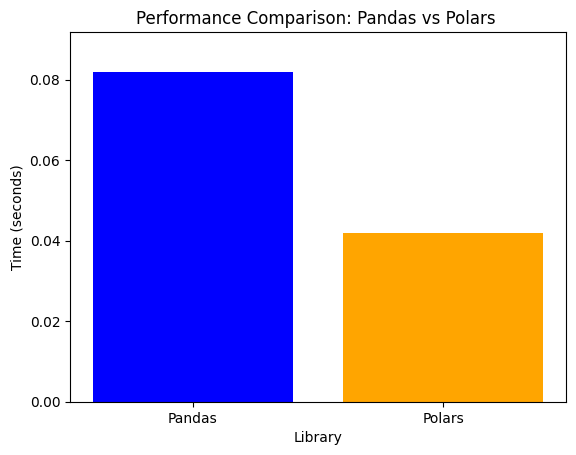

In [41]:
import matplotlib.pyplot as plt
time_pandas = 0.0818
time_polars = 0.0420
labels = ['Pandas', 'Polars']
times = [time_pandas, time_polars]
plt.bar(labels, times, color=['blue', 'orange'])
plt.title("Performance Comparison: Pandas vs Polars ")
plt.ylabel("Time (seconds)")
plt.xlabel("Library")
plt.ylim(0, max(times) + 0.01)
plt.show()


Execution Time:

Polars completed the operation in 0.042 seconds, while Pandas took 0.0818 seconds. This shows that Polars is nearly 2x faster for the same task, demonstrating its efficiency in handling large datasets.
Efficient Computation:

Polars is written in Rust, a highly performant systems programming language, which provides faster execution times compared to Python-based Pandas.
Polars leverages optimized columnar memory layout, ensuring efficient CPU cache utilization.
Parallelism:

Polars supports native multithreading, enabling better use of multi-core processors to perform tasks in parallel. Pandas, on the other hand, primarily operates on a single thread.
Memory Efficiency:

Polars uses the Apache Arrow memory model, which minimizes memory overhead by directly accessing data in an optimized format. This allows Polars to process large datasets more effectively without requiring excessive memory.
Lazy Evaluation (Optional):

While not used in this specific comparison, Polars' LazyFrame feature allows for deferred execution, combining multiple operations into a single optimized pipeline. This can further enhance performance in more complex workflows.